<a href="https://colab.research.google.com/github/Dwarkamoye/Python-CS5590-490-0001/blob/master/Deep_Learning_6/Denosing_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
inital = x_train
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.5353 - val_loss: 0.4650
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.4290 - val_loss: 0.4051
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3984 - val_loss: 0.3848
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.3817 - val_loss: 0.3690
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.3693 - val_loss: 0.3571
Epoch 6/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.3597 - val_loss: 0.3471
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.3517 - val_loss: 0.3388
Epoch 8/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.3451 - val_loss: 0.3320
Epoch 9/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.3397 - val_loss: 0

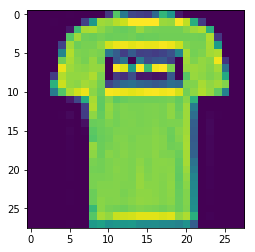

In [8]:
from matplotlib import pyplot as plt
plt.imshow(inital[1].reshape(28,28))
plt.show()

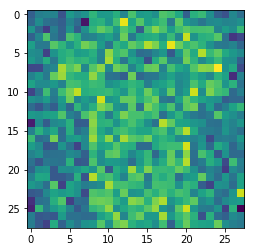

In [9]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()

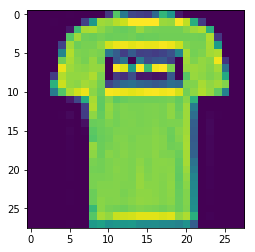

In [10]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.4955 - acc: 0.4575 - val_loss: 0.3988 - val_acc: 0.4901
Epoch 2/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3794 - acc: 0.4935 - val_loss: 0.3714 - val_acc: 0.4926
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3652 - acc: 0.4959 - val_loss: 0.3614 - val_acc: 0.4978
Epoch 4/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3532 - acc: 0.4981 - val_loss: 0.3485 - val_acc: 0.4995
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.3426 - acc: 0.5000 - val_loss: 0.3387 - val_acc: 0.5000
Epoch 6/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3359 - acc: 0.5010 - val_loss: 0.3376 - val_acc: 0.4963
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3320 - acc: 0.5015 - val_loss: 0.3332 - 

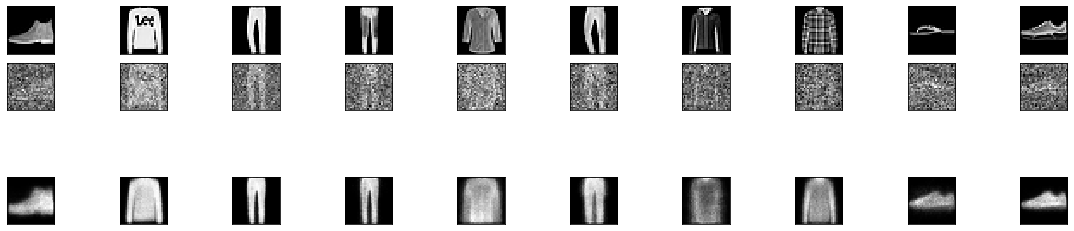

In [16]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

#Input image
input_img= Input(shape=(784,))
# encoded and decoded layer for the autoencoder
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(encoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
# Building autoencoder
autoencoder=Model(input_img, decoded)
#extracting encoder
encoder = Model(input_img, encoded)
# compiling the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
X_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
X_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# Fitting the noise trained data to the autoencoder 
autoencoder.fit(X_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, x_test))
# reconstructing the image from autoencoder and encoder
encoded_imgs = encoder.predict(X_test_noisy)
predicted = autoencoder.predict(X_test_noisy)
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()